In [2]:
import pandas as pd
import os, sys

sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '../../')))

from utils.time_utils import TimeProcessorConv2d

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
base_dir = "/Users/andrew/Desktop/Harvard/idreos-research/gpu_profiling"
time_processor_conv2d = TimeProcessorConv2d(base_dir)
df = time_processor_conv2d.get_data(sample_rate=0.5)

< 0 found
< 0 found
< 0 found
< 0 found
< 0 found
< 0 found
< 0 found
< 0 found
< 0 found
< 0 found
< 0 found
< 0 found
< 0 found


/Users/andrew/Desktop/Harvard/idreos-research/gpu_profiling/utils/time_utils.py:251: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dfs = pd.concat(dfs, axis=0, ignore_index=True)


In [9]:
df.query("time < 0")

,kernel_params,time,dtype,b,in_channels,iH,iW,out_channels,groups,kH,kW,stride,dilation,transposed,gflops


In [10]:
df["time"].isna().sum()

0

In [11]:
df = df.query("time >= 0").dropna()

In [12]:
df

,kernel_params,time,dtype,b,in_channels,iH,iW,out_channels,groups,kH,kW,stride,dilation,transposed,gflops
0,16.32.1024.8.8.4096.128.3.3.1.1.0,0.115712,16,32,1024,8,8,4096,128,3,3,1,1,0,154.618823
1,32.32.512.8.8.4096.256.5.5.1.1.0,0.183296,32,32,512,8,8,4096,256,5,5,1,1,0,214.748365
2,16.2.32.8.8.2048.1.5.7.1.1.0,0.039424,16,2,32,8,8,2048,1,5,7,1,1,0,0.587203
3,b16.16.128.8.8.4096.1.5.5.1.1.0,0.114688,b16,16,128,8,8,4096,1,5,5,1,1,0,26.843546
4,16.16.512.8.8.8.1.7.3.1.1.0,0.043008,16,16,512,8,8,8,1,7,3,1,1,0,0.176161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228205,16.2.128.1024.128.128.1.7.5.1.1.1,1.648128,16,2,128,1024,128,128,1,7,5,1,1,1,300.647711
228206,32.4.1536.1024.128.1536.512.5.5.1.1.1,112.398849,32,4,1536,1024,128,1536,512,5,5,1,1,1,61847.529062
228207,16.8.1024.1024.128.1024.256.7.3.1.1.1,20.600320,16,8,1024,1024,128,1024,256,7,3,1,1,1,46179.488367
228208,b16.2.1536.1024.128.1536.128.3.5.1.1.1,10.984448,b16,2,1536,1024,128,1536,128,3,5,1,1,1,18554.258719


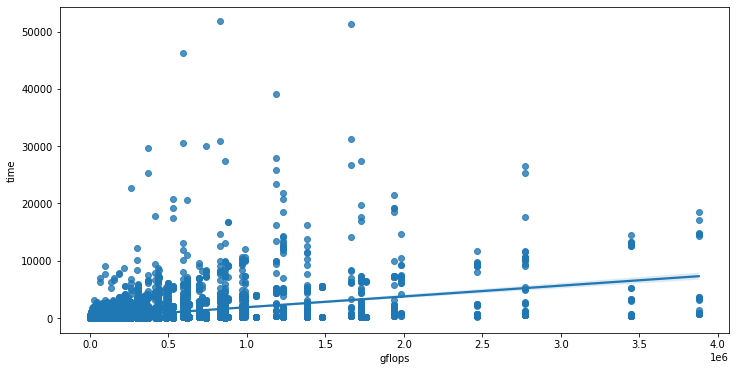

In [4]:
plt.figure(figsize=(12,6))
sns.regplot(x="gflops", y="time", data=df)
plt.show()

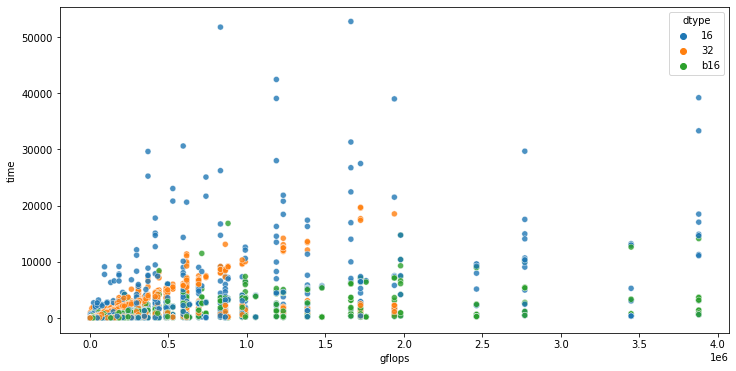

In [13]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="gflops", y="time", hue="dtype", alpha=0.8, data=df)
plt.show()

32---------------------------------------


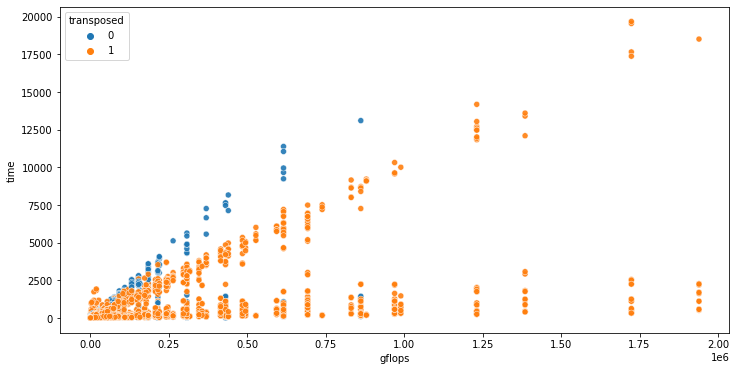

b16---------------------------------------


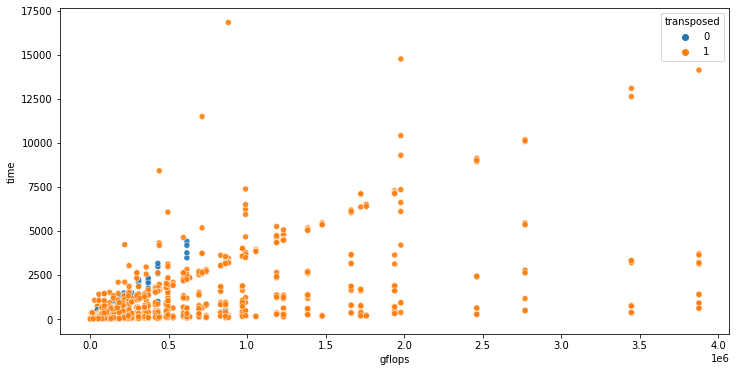

16---------------------------------------


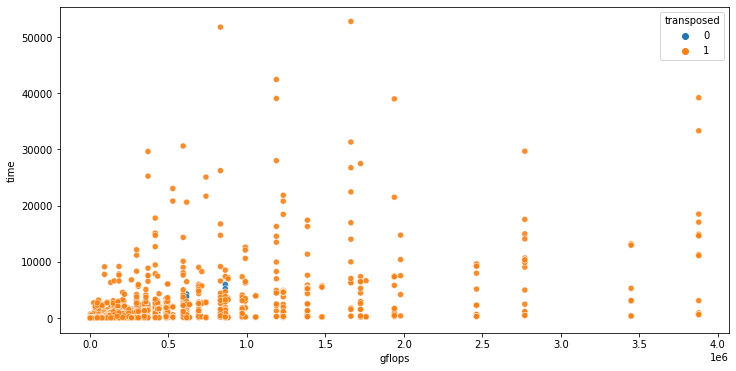

In [14]:
for dtype in ["32", "b16", "16"]:
    print(f"{dtype}---------------------------------------")
    plt.figure(figsize=(12,6))
    sns.scatterplot(x="gflops", y="time", hue="transposed", alpha=0.9, data=df.query(f"dtype == '{dtype}'"))
    plt.show()

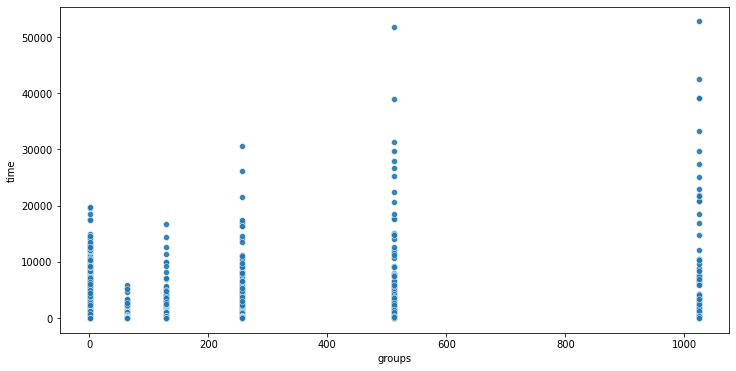

In [17]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="groups", y="time", alpha=0.9, data=df)
plt.show()

# Filtering Outliers

Unclear why these have outliers

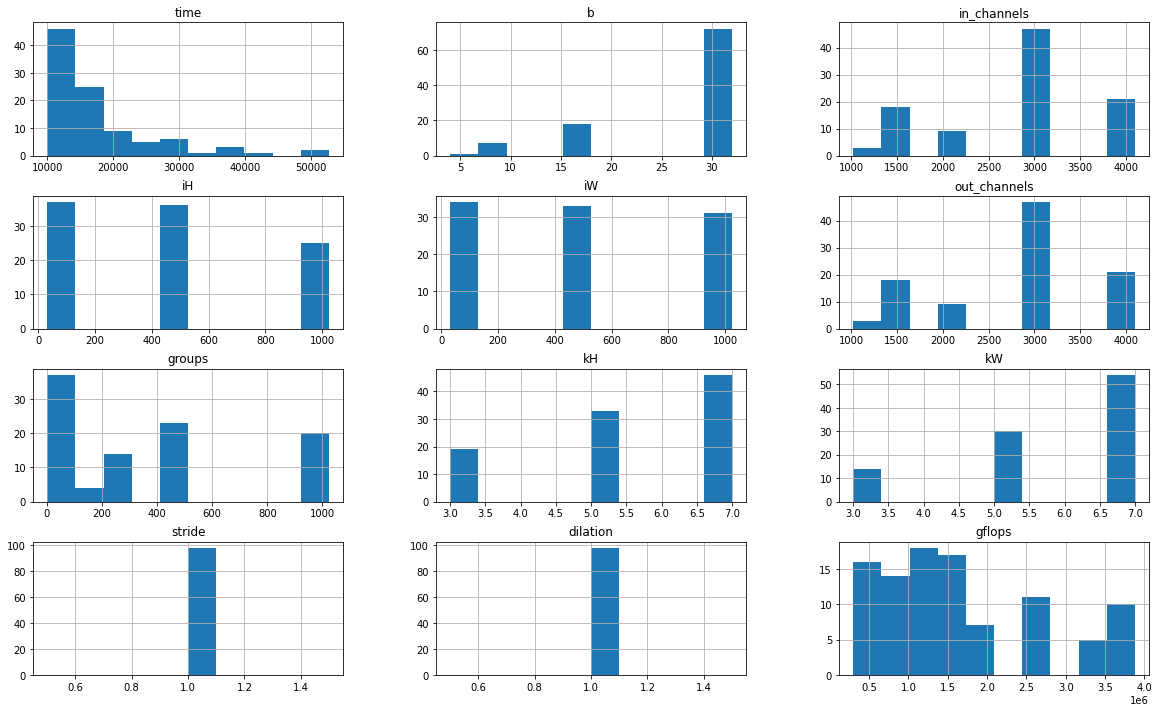

In [25]:
df.query("time > 10000").hist(figsize=(20, 12))
plt.show()

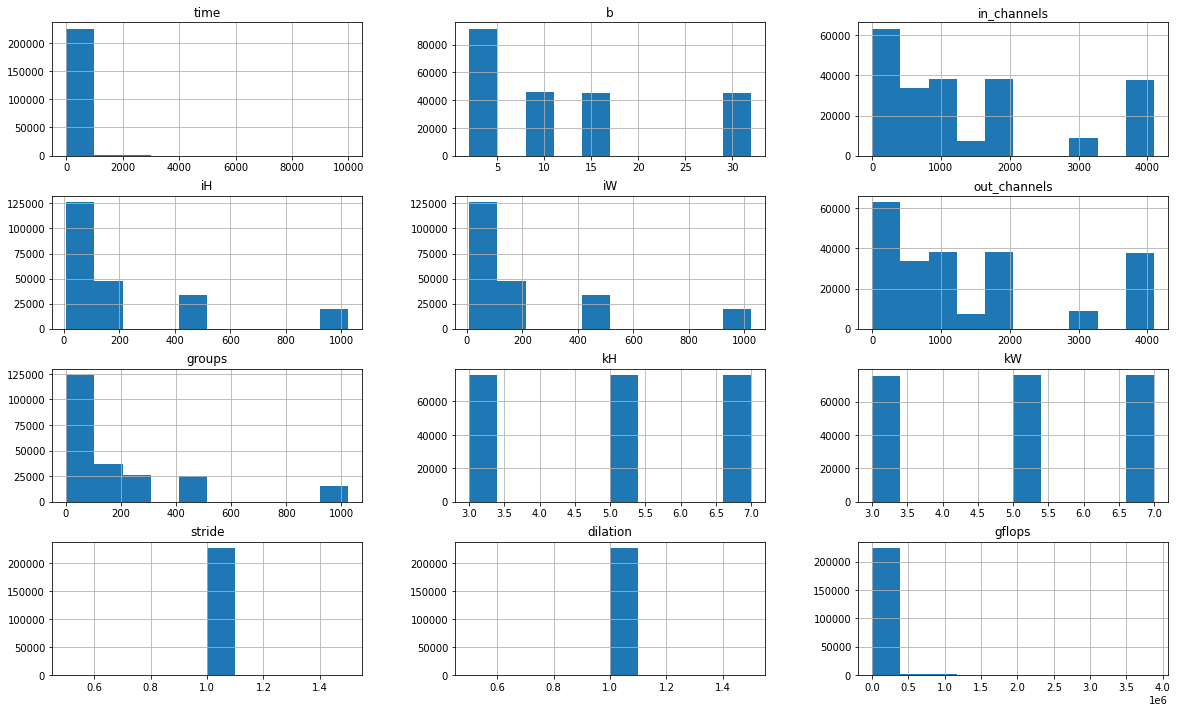

In [26]:
df.query("time < 10000").hist(figsize=(20, 12))
plt.show()

In [5]:
"""
TODO: convert to logscale for time?
"""

df.query("time > 10000")

,kernel_params,time,dtype,b,in_channels,iH,iW,out_channels,groups,kH,kW,stride,dilation,transposed,gflops
110027,32.32.4096.32.512.4096.1.7.7.1.1.0,13109.235840,32,32,4096,32,512,4096,1,7,7,1,1,0,8.620171e+05
125604,32.32.3072.32.1024.3072.1.7.7.1.1.1,10669.645508,32,32,3072,32,1024,3072,1,7,7,1,1,1,9.697693e+05
126409,32.32.4096.32.1024.4096.1.7.5.1.1.1,14374.399414,32,32,4096,32,1024,4096,1,7,5,1,1,1,1.231453e+06
157769,32.32.4096.128.128.4096.1.5.7.1.1.0,11057.211914,32,32,4096,128,128,4096,1,5,7,1,1,0,6.157265e+05
167718,16.32.3072.128.512.3072.1024.3.5.1.1.1,11834.389160,16,32,3072,128,512,3072,1024,3,5,1,1,1,5.937363e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227668,b16.32.3072.1024.128.3072.1024.5.5.1.1.1,10406.015137,b16,32,3072,1024,128,3072,1024,5,5,1,1,1,1.979121e+06
227682,16.32.3072.1024.128.3072.1.7.7.1.1.1,14643.115234,16,32,3072,1024,128,3072,1,7,7,1,1,1,3.879077e+06
227690,16.32.3072.1024.128.3072.512.3.5.1.1.1,23367.762695,16,32,3072,1024,128,3072,512,3,5,1,1,1,1.187473e+06
227861,16.32.3072.1024.128.3072.256.5.3.1.1.1,13478.890137,16,32,3072,1024,128,3072,256,5,3,1,1,1,1.187473e+06


# Results from "Predicting the Computational Cost of Deep Learning Models"

In [8]:
paper_df = df.query("iH <= 512 and iW <= 512")
paper_df = paper_df[paper_df["in_channels"] < 10000 / (paper_df["iH"] * paper_df["iW"])]
paper_df = paper_df[paper_df["out_channels"] < 10000 / (paper_df["iH"] * paper_df["iW"])]

In [13]:
paper_df.describe()

,time,b,in_channels,iH,iW,out_channels,groups,kH,kW,stride,dilation,gflops
count,5762.000000,5762.000000,5762.000000,5762.000000,5762.000000,5762.000000,5762.000000,5762.000000,5762.000000,5762.0,5762.0,5762.000000
mean,0.037317,12.396737,23.576536,38.281152,38.651857,23.652551,6.425547,5.007289,4.979868,1.0,1.0,0.072848
std,0.018928,10.919416,38.101716,79.313563,81.282780,38.071121,22.582036,1.631772,1.633578,0.0,0.0,0.252941
min,0.018432,2.000000,2.000000,8.000000,8.000000,2.000000,1.000000,3.000000,3.000000,1.0,1.0,0.000009
25%,0.024064,4.000000,2.000000,8.000000,8.000000,2.000000,1.000000,3.000000,3.000000,1.0,1.0,0.001638
50%,0.034816,8.000000,8.000000,8.000000,8.000000,8.000000,1.000000,5.000000,5.000000,1.0,1.0,0.006554
75%,0.044032,16.000000,32.000000,32.000000,32.000000,32.000000,1.000000,7.000000,7.000000,1.0,1.0,0.031457
max,0.540672,32.000000,128.000000,512.000000,512.000000,128.000000,128.000000,7.000000,7.000000,1.0,1.0,3.288334


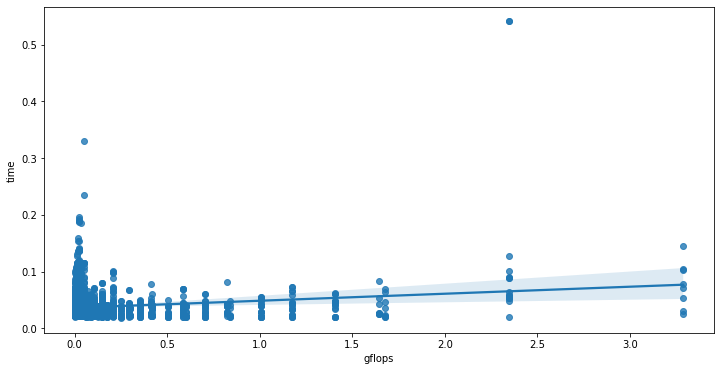

In [11]:
plt.figure(figsize=(12,6))
sns.regplot(x="gflops", y="time", data=paper_df)
plt.show()